### Imports

In [49]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

### Constants

In [4]:
SUBMISSIONS_DATA = "../data/submissions.csv" 
COMMENTS_DATA = "../data/top_comments_50000_100.csv"
nltk.download("punkt")
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Functions

In [67]:
# def get_higest_tfidf_words(comments, n=25, remove_stop=True, **kwargs):
#     stop_words = "english" if remove_stop else None
#     vectoriser = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, **kwargs)
#     tfidf = vectoriser.fit_transform(comments)

#     feature_names = np.array(vectoriser.get_feature_names_out())
#     tfidf_scores = np.asarray(tfidf.sum(axis=0)).ravel()
#     word_scores = dict(zip(feature_names, tfidf_scores))
#     word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

#     return word_scores[:n]

def create_wordcloud(comments):
    wc = WordCloud(background_color='white').generate(" ".join(comments))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def get_most_common_words(comments, n=25, remove_stop=True):
    tokens = [
        word 
        for word in " ".join(comments).split()
        if remove_stop and word not in STOPWORDS
    ]
    return Counter(tokens).most_common(n)

### Load Data

In [6]:
submissions = pd.read_csv(SUBMISSIONS_DATA)
print(submissions.shape)
submissions.head()

(318498, 13)


C:\Users\Rory\AppData\Local\Temp\ipykernel_13140\2384065944.py:1: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pd.read_csv(SUBMISSIONS_DATA)


,name,author,title,created_utc,score,is_self,over_18,selftext,is_video,is_reddit_media_domain,is_gallery,domain,url
0,t3_33fxn6,[deleted],Do your worst!,1429678694,2,False,True,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/WuVB0FT.jpg
1,t3_33iz0o,SwagmasterEDP,do your worst!,1429740688,38,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/lg4GoAs.jpg
2,t3_33j2l2,[deleted],/u/Tyoko,1429742238,3,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/VJ2TVZC.jpg
3,t3_3bti9n,[deleted],Not saying if I'm the fish or the guy.,1435798027,209,False,False,NaN,NaN,NaN,NaN,i.imgur.com,http://i.imgur.com/zkjSV0D.jpg
4,t3_3btkg6,Tyrosoldier,roast me you betafucks,1435799165,16,False,False,NaN,NaN,NaN,NaN,i.imgur.com,http://i.imgur.com/bbqZD0B.jpg


In [7]:
comments = pd.read_csv(COMMENTS_DATA)
print(comments.shape)
comments.head()

(36898, 9)


,id,author,created_utc,parent_id,link_id,score,controversiality,is_submitter,body
0,cspcsxv,Tyrosoldier,1435798221,t3_3bti9n,t3_3bti9n,661,0,NaN,dis nigga look like the penguin
1,cspd39z,SwagmasterEDP,1435798735,t3_3bti9n,t3_3bti9n,149,0,NaN,the next thing you should catch is a dentist
2,cspd9af,RimJobRhinoceros,1435799040,t3_3bti9n,t3_3bti9n,132,0,NaN,I love seeing people with down syndrome so hap...
3,cspe2vi,SwagmasterEDP,1435800586,t3_3btn16,t3_3btn16,687,0,NaN,I think your barber already did.
4,cspe6c0,lolwtface,1435800769,t3_3btn16,t3_3btn16,347,0,NaN,You look like you got paid to hold a dudes loa...


### Comments EDA

#### Commnets per Post

count    7781.000000
mean        4.742064
std         5.057857
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max        42.000000
dtype: float64


<Axes: >

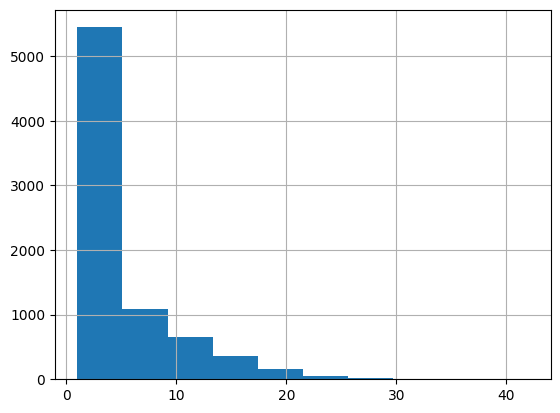

In [65]:
comments_per_post = comments.groupby("parent_id").size()
print(comments_per_post.describe())
comments_per_post.hist()

#### Scores

count    36898.000000
mean       648.140983
std       1271.579467
min        100.000000
25%        145.000000
50%        247.000000
75%        574.000000
max      29739.000000
Name: score, dtype: float64


<Axes: >

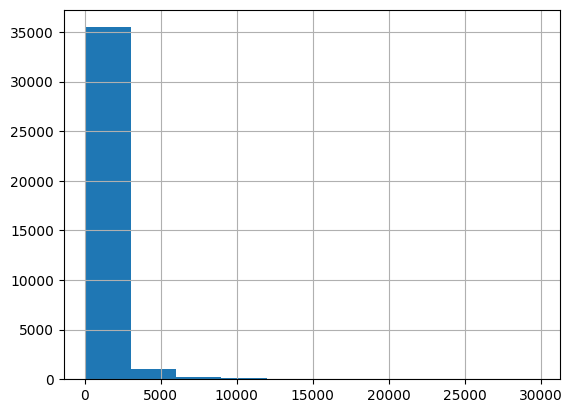

In [53]:
print(comments.score.describe())
comments.score.hist()

In [63]:
comments.sort_values("score", ascending=False)[["body", "score", "parent_id"]][:10]

,body,score,parent_id
14435,Bro what happened,29739,t3_gm4wy7
14652,Got your mom’s titties and your dad’s face.,24517,t3_gu5mlk
20680,You definitely skip face day,22718,t3_l28sih
16796,Are you and your girlfriend the same person?,22297,t3_idvh7v
21380,Went from Pam Anderson to Louie Anderson and a...,21302,t3_loxfjl
14385,Which sword do you use to cut your shits up so...,21242,t3_gkmcol
14426,Your dad had to roofie your mom just so you co...,21044,t3_gm4wy7
16251,"Everything about you says... ""Blow it on my ti...",20162,t3_i51qm0
11308,Do you really need three clocks to let you kno...,19099,t3_5dke49
21154,Wii Fit,19004,t3_likem0


In [59]:
print(comments.controversiality.describe())

count    36898.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: controversiality, dtype: float64


#### Word Count

In [66]:
comments["body_lower"] = comments.body.apply(lambda body: body.lower())
comments["tokens"] = comments.body_lower.apply(lambda body: word_tokenize(body))
comments.head()

,id,author,created_utc,parent_id,link_id,score,controversiality,is_submitter,body,tokens,word_count,body_lower
0,cspcsxv,Tyrosoldier,1435798221,t3_3bti9n,t3_3bti9n,661,0,NaN,dis nigga look like the penguin,"[dis, nigga, look, like, the, penguin]",6,dis nigga look like the penguin
1,cspd39z,SwagmasterEDP,1435798735,t3_3bti9n,t3_3bti9n,149,0,NaN,the next thing you should catch is a dentist,"[the, next, thing, you, should, catch, is, a, ...",9,the next thing you should catch is a dentist
2,cspd9af,RimJobRhinoceros,1435799040,t3_3bti9n,t3_3bti9n,132,0,NaN,I love seeing people with down syndrome so hap...,"[i, love, seeing, people, with, down, syndrome...",10,i love seeing people with down syndrome so hap...
3,cspe2vi,SwagmasterEDP,1435800586,t3_3btn16,t3_3btn16,687,0,NaN,I think your barber already did.,"[i, think, your, barber, already, did, .]",7,i think your barber already did.
4,cspe6c0,lolwtface,1435800769,t3_3btn16,t3_3btn16,347,0,NaN,You look like you got paid to hold a dudes loa...,"[you, look, like, you, got, paid, to, hold, a,...",15,you look like you got paid to hold a dudes loa...


count    36898.000000
mean        15.670714
std         17.291167
min          1.000000
25%          9.000000
50%         13.000000
75%         18.000000
max        797.000000
Name: word_count, dtype: float64


<Axes: >

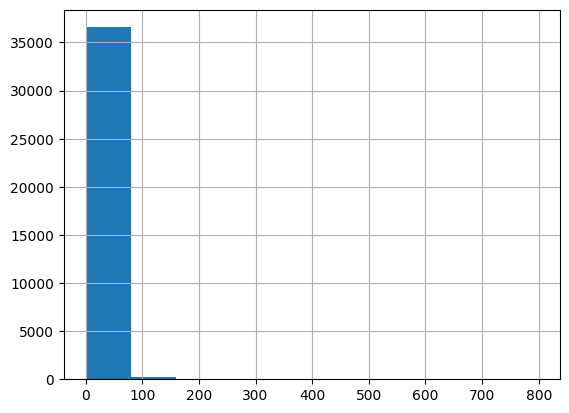

In [9]:
comments["word_count"] = comments.tokens.apply(len)
print(comments.word_count.describe())
comments.word_count.hist()

#### Common Words

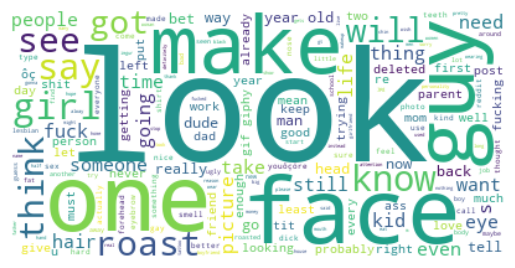

In [68]:
create_wordcloud(comments.body_lower)

In [69]:
get_most_common_words(comments.body_lower)

[('like', 8247),
 ('look', 5782),
 ('get', 1682),
 ('looks', 1665),
 ('one', 1509),
 ('face', 1239),
 ('would', 1215),
 ('make', 1018),
 ('know', 969),
 ("i'm", 902),
 ('you.', 875),
 ('got', 873),
 ('see', 830),
 ('even', 786),
 ('think', 775),
 ('guy', 758),
 ('people', 749),
 ('old', 724),
 ('could', 723),
 ('still', 720),
 ('hair', 714),
 ('going', 713),
 ('girl', 710),
 ('roast', 664),
 ('someone', 660)]

In [70]:
most_common_1_word = get_most_common_words(comments[comments.word_count == 1].body_lower, n=7)
most_common_1_word

[('feminem', 5),
 ('r/dontputyourdickinthat', 4),
 ('pass', 2),
 ('r/13or30', 2),
 ('onlyrefunds', 2),
 ('onlymans', 2),
 ('/r/punchablefaces', 1)]

Check if these 1 liners are being made the same person

In [71]:
comments[comments.body_lower.isin([word for word, _ in most_common_1_word])] .groupby(["body", "author"]).size()

body                     author         
Feminem                  G-Skillz85         1
                         N3ONKATMAN         1
                         SnixPlaysAlot      1
                         samx3i             1
                         upchuckle          1
OnlyMans                 MrJack12345        1
                         blondart           1
OnlyRefunds              SmellPoop          1
                         love2kick          1
Pass                     Shlopcakes         1
pass                     mayur2204          1
r/13or30                 DocHoliday79       1
                         Worthless_Sheep    1
r/dontputyourdickinthat  DickyMcGrumpy      1
                         ShadowCetra        1
                         [deleted]          1
                         harzivall          1
dtype: int64

In [76]:
comments.body_lower.value_counts()[:50]

body_lower
[deleted]                                        479
[removed]                                        161
why the long face?                                12
shut up meg                                        7
molly ringworm                                     5
carrot bottom                                      5
ellen degenerate                                   5
feminem                                            5
trailer swift                                      5
![gif](giphy|ayjfdmmgs7oku)                        5
if mlk had a nightmare                             5
zz bottom                                          5
machine gun smelly                                 5
![gif](giphy|3rdnnpumx7tya)                        4
![gif](giphy|5yhffufq6ztry|downsized)              4
![gif](giphy|u3fkqnnkwvvdk)                        4
r/dontputyourdickinthat                            4
post alone                                         4
shut up meg.                       

### Submissions EDA